In [65]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
from itertools import chain
%matplotlib inline
from rdkit.Chem.SaltRemover import SaltRemover
from sklearn.model_selection import StratifiedKFold

# read edited text file from Aliper supplement

In [2]:
os.chdir("/home/jgmeyer2/drugclass/small_model_aliper/data/")

In [4]:
df = pd.read_csv('aliperdrugs_sortbyclass.csv')
df.head()

,Pubchem CID,Broad_ID,Anti Infective Agents,Anti Inflammatory Agents,Antineoplastic Agents,Cardiovascular Agents,Central Nervous System Agents,Dermatologic Agents,Gastrointestinal Agents,Hematologic Agents,Lipid Regulating Agents,Reproductive Control Agents,Respiratory System Agents,Urological Agents
0,6842999,BRD-A00100033,1,0,0,0,0,0,0,0,0,0,0,0
1,71446,BRD-A10303790,1,0,0,0,0,0,0,0,0,0,0,0
2,47472,BRD-A16665823,1,0,0,0,0,0,0,0,0,0,0,0
3,5362868,BRD-A17065207,1,0,0,0,0,0,0,0,0,0,0,0
4,42574,BRD-A19952358,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
colnames = df.columns.tolist()[2:16]
colnames


In [32]:
CID_dict = {}
for x in colnames:
    CID_dict[x] = df['Pubchem CID'][df[x]==1].tolist()

In [33]:
CID_dict

{'Anti Infective Agents': [6842999,
  71446,
  47472,
  5362868,
  42574,
  16129995,
  5853,
  5353446,
  5482,
  40854,
  3793,
  93858,
  54684459,
  45114068,
  3352,
  68589,
  37392,
  16218979,
  359247,
  16667695,
  6420045,
  71815,
  65495,
  3279,
  15165,
  3823,
  4189,
  5071,
  6321414,
  4046,
  2378,
  15459,
  65863,
  5064,
  5330,
  5388984,
  20848883,
  26596,
  60825,
  6256,
  5281912,
  6321411,
  5281901,
  23667628,
  71616,
  5959,
  153941,
  441140,
  441243,
  6426773,
  19529,
  5327,
  38911,
  3561,
  5478883,
  5702153,
  464205,
  2812,
  2722,
  2236,
  23667630,
  51039,
  3454,
  5104,
  5361463,
  3085416,
  5337997,
  149784,
  23581793,
  1046,
  5284585,
  456201,
  67313,
  5328,
  2022,
  3314,
  5462355,
  4477,
  6197,
  43507,
  2406,
  68911,
  40692,
  64139,
  4684,
  5510,
  5324,
  60772,
  5702238,
  4725,
  3634,
  5344,
  3334,
  392622,
  4622,
  12303047,
  6473883,
  6093,
  60857,
  33613,
  5904,
  441145,
  76621,
  37542,


In [34]:
print(len(CID_dict[x]))

print(CID_dict[x][0])

9
2092


# get SMILES for CIDs

### keep things with smiles length <400

In [35]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<400:  #### only those under 200 char
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))

C1CN(C[C@@H]1C(C2=CC=CC=C2)(C3=CC=CC=C3)C(=O)N)CCC4=CC5=C(C=C4)OCC5
9


In [36]:
total=0
for key in CID_dict.keys():
    total+=len(smiles_dict[key])
    print(len(smiles_dict[key]))
print(total)

142
19
111
125
173
6
30
17
19
16
11
9
678


## do any overlap?


### make master list of all smiles that overlap among the sets

In [37]:
rm = []
for key1 in smiles_dict.keys():
    print(key1+ '__________MAIN_len='+str(len(set(smiles_dict[key1]))))
    for key2 in smiles_dict.keys(): ### loop through the keys and check for overlap
        if key1 != key2: ### first key cannot equal second key
            rm.append(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))
            print(str(key2)+'_'+str(len(list(set(smiles_dict[key1]) & set(smiles_dict[key2])))))

Anti Infective Agents__________MAIN_len=142
Anti Inflammatory Agents_0
Antineoplastic Agents_0
Cardiovascular Agents_0
Central Nervous System Agents_0
Dermatologic Agents_0
Gastrointestinal Agents_0
Hematologic Agents_0
Lipid Regulating Agents_0
Reproductive Control Agents_0
Respiratory System Agents_0
Urological Agents_0
Anti Inflammatory Agents__________MAIN_len=19
Anti Infective Agents_0
Antineoplastic Agents_0
Cardiovascular Agents_0
Central Nervous System Agents_0
Dermatologic Agents_0
Gastrointestinal Agents_0
Hematologic Agents_0
Lipid Regulating Agents_0
Reproductive Control Agents_0
Respiratory System Agents_0
Urological Agents_0
Antineoplastic Agents__________MAIN_len=111
Anti Infective Agents_0
Anti Inflammatory Agents_0
Cardiovascular Agents_0
Central Nervous System Agents_0
Dermatologic Agents_0
Gastrointestinal Agents_0
Hematologic Agents_0
Lipid Regulating Agents_0
Reproductive Control Agents_0
Respiratory System Agents_0
Urological Agents_0
Cardiovascular Agents________

### there is no overlap

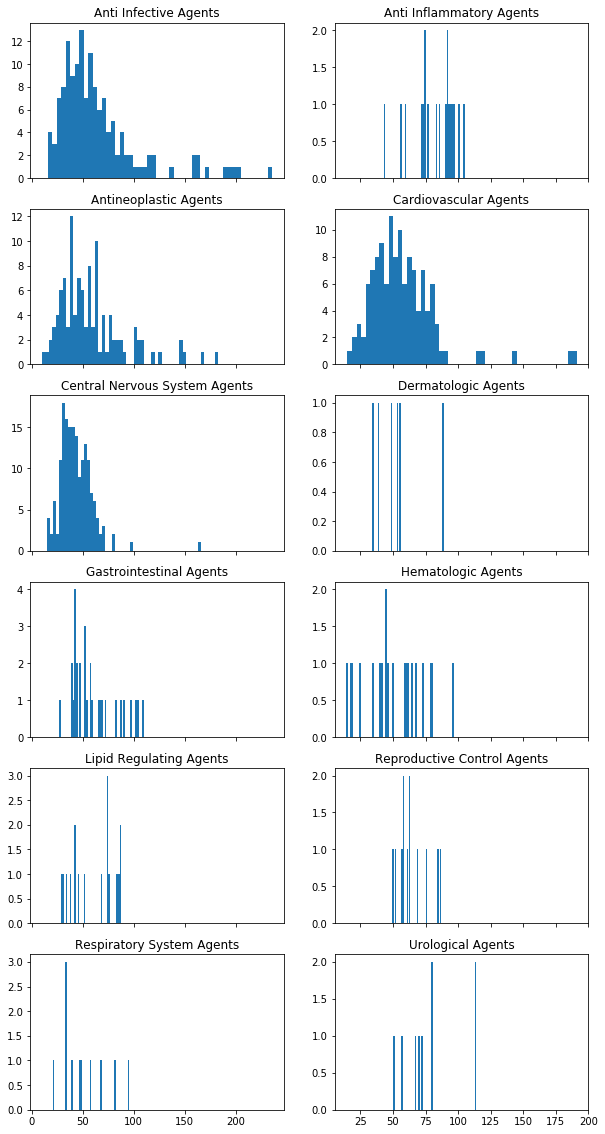

In [44]:
#smiles_dict = nsmilesd
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

# Remove salts

In [51]:
os.chdir('/home/jgmeyer2/drugclass/small_model_aliper/data/')

In [52]:
remover = SaltRemover()
cln_smiles_dict = {}

for key in smiles_dict.keys():
    tmplist = []
    for smiles in smiles_dict[key]:
        tmplist.append(Chem.MolToSmiles(remover(Chem.MolFromSmiles(smiles))))
    cln_smiles_dict[key] = list(set(tmplist))

In [53]:
cln_smiles_dict['Urological Agents']

['COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN3C[C@H]2C[C@@H](OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)[C@@H]1OC',
 'NC(=O)C(c1ccccc1)(c1ccccc1)[C@@H]1CCN(CCc2ccc3c(c2)CCO3)C1',
 'COc1cc2nc(N3CCN(C(=O)C4CCCO4)CC3)nc(N)c2cc1OC',
 'CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(=O)C=C[C@]4(C)[C@H]3CC[C@]12C',
 'CCOC(=O)Oc1c(OC)cc(C(=O)O[C@@H]2C[C@@H]3CN4CCc5c([nH]c6cc(OC)ccc56)[C@H]4C[C@@H]3[C@H](C(=O)OC)[C@H]2OC)cc1OC',
 'COc1ccc2c3c([nH]c2c1)[C@H]1C[C@H]2[C@H](C[C@@H](O)[C@H](OC)[C@H]2C(=O)O)CN1CC3',
 'COc1cc2nc(N(C)CCCNC(=O)C3CCCO3)nc(N)c2cc1OC',
 'COC(=O)[C@@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc45)[C@@H]3C[C@H]12',
 'COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc45)[C@@H]3C[C@@H]21']

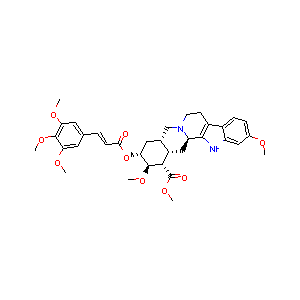

In [54]:
Chem.Draw.MolToImage(Chem.MolFromSmiles('COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c4CCN3C[C@H]2C[C@@H](OC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)[C@@H]1OC'))

# write smiles without salts

In [55]:
for key in cln_smiles_dict.keys():
    with open(key+"_smiles_rmsalt.csv","w") as outfile:
        for smiles in cln_smiles_dict[key]:
            outfile.write(smiles + '\n')

# make PNGs of SMILES

In [56]:
# write the files in order from the SMILES dictionary
PATH = '/home/jgmeyer2/drugclass/small_model_aliper/data/pics/'
for key in cln_smiles_dict.keys():
    n = 0
    os.makedirs(PATH+str(key).strip('.'), exist_ok=True)
    for smiles in cln_smiles_dict[key]:
        Draw.MolToFile(Chem.MolFromSmiles(str(smiles)), fileName=PATH+str(key)+'/'+str(n)+'.png', size=(500, 500), kekulize=True, wedgeBonds=True, imageType="png")
        n +=1

### use same dictionary to write classes file

In [57]:
### make clases file with pngpath, class, and smiles
### same order as done for the image generation so the picture naming matches this class/path file
master_pngpath = []
master_class = []
master_smiles = []

for key in cln_smiles_dict.keys():
    n = 0
    for smiles in cln_smiles_dict[key]:
        master_pngpath.append(key +'/' + str(n))
        master_class.append(key)
        master_smiles.append(smiles)
        n +=1

# make .csv with 2 columns, id and class

In [58]:
rows = zip(master_pngpath, master_class, master_smiles)

In [59]:
import csv

with open('12cls_rmsaltol.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

#### Then remove extra classes manually in excel and create new files with 5-class and 3-class subsets

### make .csv files with indexes of validation

In [62]:
PATH = "/home/jgmeyer2/drugclass/small_model_aliper/data/"

In [74]:
### 10 splits in order
def get_valids_skf(label_csv):
    label_df = pd.read_csv(label_csv)
    X = label_df['smiles']
    y = label_df['class']
    skf = StratifiedKFold(n_splits=10, random_state=100, shuffle=False)
    skf.get_n_splits(X, y)
    print(skf)
    validsets=[]
    for train_index, test_index in skf.split(X, y):
        validsets.append(test_index)
    return(validsets)

In [75]:
### write new 3 class splits to file
VALIDSETS = get_valids_skf(f'{PATH}3cls_aliper.csv')

for y in range(0, len(VALIDSETS)):
    idlist = VALIDSETS[y].tolist()
    with open('3cls_aliper_2ndshuffle' +str(y)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(map(lambda x: [x], idlist))

StratifiedKFold(n_splits=6, random_state=100, shuffle=True)


In [76]:
### write new 3 class splits to file
VALIDSETS = get_valids_skf(f'{PATH}5cls_aliper.csv')

for y in range(0, len(VALIDSETS)):
    idlist = VALIDSETS[y].tolist()
    with open('5cls_aliper_2ndshuffle' +str(y)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(map(lambda x: [x], idlist))

StratifiedKFold(n_splits=6, random_state=100, shuffle=True)


In [77]:
### write new 3 class splits to file
VALIDSETS = get_valids_skf(f'{PATH}12cls_aliper.csv')

for y in range(0, len(VALIDSETS)):
    idlist = VALIDSETS[y].tolist()
    with open('12cls_aliper_2ndshuffle' +str(y)+'.csv', 'w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(map(lambda x: [x], idlist))

StratifiedKFold(n_splits=6, random_state=100, shuffle=True)


## Note that fold indexes 6-9 are missing at least one validation molecule, and fold 9 is missing 2 molecules